In [14]:
%matplotlib inline

In [5]:
import numpy as np
np.random.seed(123)

In [2]:
# make sure to create kernel in virtual env and change it in the notebook
import theano

In [4]:
# have to edit "backend" field in $HOME/.keras/keras.json from "tensorflow" to "theano"
from keras.models import Sequential

Using Theano backend.


In [6]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [35]:
from keras.layers import Conv2D, MaxPooling2D

In [9]:
from keras.utils import np_utils

In [10]:
# lets make sure to tell them this is BS data lol 
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


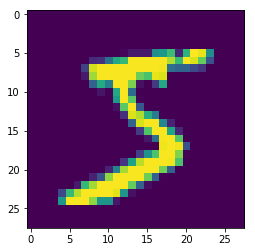

In [15]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [16]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [18]:
print (X_train.shape)
# (60000, 1, 28, 28)

(60000, 1, 28, 28)


In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
print (y_train.shape)
# (60000,)

(60000,)


In [22]:
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [23]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
print(Y_train.shape)

(60000, 10)


In [88]:
model = Sequential()

In [89]:
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(1,28,28)))

In [90]:
print(model.output_shape)
# (None, 32, 26, 26) <- their answer

(None, -1, 26, 32)


In [91]:
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(1,28,28)))

In [92]:
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

In [93]:
#model.add(Flatten())

In [94]:
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))

In [95]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [96]:
model.fit(X_train, 
          Y_train, 
          batch_size=32, 
          epochs=10, 
          verbose=1)

ValueError: Error when checking target: expected conv2d_19 to have 4 dimensions, but got array with shape (60000, 10)

In [87]:
score = model.evaluate(X_test, Y_test, verbose=0)

ValueError: Error when checking target: expected flatten_5 to have shape (-768,) but got array with shape (10,)